# 01 Importing libraries and Data

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import os

In [2]:
path = r'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

In [3]:
df_ords = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'orders.csv'), index_col = False)

In [4]:
df_prods= pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products.csv'), index_col = False)

In [5]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col=False)

In [6]:
path

'/Users/jazmingutierrez/DEC2023 Instacart Basket Analysis'

# 02 Wrangling Procedures

In [7]:
df_ords.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order'],
      dtype='object')

In [8]:
# Dropping eval_set
df_ords = df_ords.drop(columns = ['eval_set'])

In [9]:
df_ords.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [10]:
df_ords['days_since_prior_order'].value_counts(dropna = False)

days_since_prior_order
30.0    369323
7.0     320608
6.0     240013
4.0     221696
3.0     217005
5.0     214503
NaN     206209
2.0     193206
8.0     181717
1.0     145247
9.0     118188
14.0    100230
10.0     95186
13.0     83214
11.0     80970
12.0     76146
0.0      67755
15.0     66579
16.0     46941
21.0     45470
17.0     39245
20.0     38527
18.0     35881
19.0     34384
22.0     32012
28.0     26777
23.0     23885
27.0     22013
24.0     20712
25.0     19234
29.0     19191
26.0     19016
Name: count, dtype: int64

In [11]:
# Renaming order_dow
df_ords.rename(columns = {'order_dow' : 'orders_day_of_week'}, inplace  = True)

In [12]:
df_ords.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


In [13]:
# Changing Variable Type
df_ords.describe()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.214874e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.111484e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.206737e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01


In [14]:
# Changing Variable Type
df_ords['order_id'] = df_ords['order_id'].astype('str')

In [15]:
df_ords['order_id'].dtype

dtype('O')

In [16]:
# Transposing df_dep
df_dep_t = df_dep.T

In [17]:
df_dep_t.reset_index()

,index,0
0,department_id,department
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international
7,7,beverages
8,8,pets
9,9,dry goods pasta


In [18]:
# Take the first row of df_dep_t for the header
new_header = df_dep_t.iloc[0]

In [19]:
new_header

0    department
Name: department_id, dtype: object

In [20]:
# Take the data under the header row for a new df
df_dep_t_new = df_dep_t[1:]

In [21]:
df_dep_t_new

,0
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [22]:
# Set header row as the df header
df_dep_t_new.columns = new_header

In [23]:
df_dep_t_new

department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


# 2. Changing another variable 


In [24]:
# Changing a Variable
df_ords['user_id'].astype('str')

0               1
1               1
2               1
3               1
4               1
            ...  
3421078    206209
3421079    206209
3421080    206209
3421081    206209
3421082    206209
Name: user_id, Length: 3421083, dtype: object

# 3. Renaming variable in df.ords

In [25]:
# Renaming order_hour_of_day
df_ords.rename(columns = {'order_hour_of_day' : 'time_of_day'}, inplace = True)

In [26]:
df_ords.head()

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0


# 4. Frequency of placing orders by the hour

In [27]:
df_ords.groupby('time_of_day').size()

time_of_day
0      22758
1      12398
2       7539
3       5474
4       5527
5       9569
6      30529
7      91868
8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
21     78109
22     61468
23     40043
dtype: int64

Frequency hour 10

# 5. Determining the meaning of value 4 in depratment_id

In [28]:
# df_dep into a datadictionary
data_dict = df_dep_t_new.to_dict('index')

In [29]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [30]:
# department_id 4
print(data_dict.get('4'))

{'department': 'produce'}


# 6. Breakfast item sales for sales team

In [31]:
# Creating subset for breakfast
df_breakfast = df_prods[df_prods['department_id']==14]

In [32]:
df_prods[df_prods['department_id']==14]

,product_id,product_name,aisle_id,department_id,prices
27,28,Wheat Chex Cereal,121,14,10.1
33,34,NaN,121,14,12.2
67,68,"Pancake Mix, Buttermilk",130,14,13.7
89,90,Smorz Cereal,121,14,3.9
210,211,Gluten Free Organic Cereal Coconut Maple Vanilla,130,14,3.6
...,...,...,...,...,...
49330,49326,Cereal Variety Fun Pack,121,14,9.1
49395,49391,Light and Fluffy Buttermilk Pancake Mix,130,14,2.0
49547,49543,Chocolate Cheerios Cereal,121,14,10.8
49637,49633,Shake 'N Pour Buttermilk Pancake Mix,130,14,14.2


In [33]:
df_breakfast.head()

,product_id,product_name,aisle_id,department_id,prices
27,28,Wheat Chex Cereal,121,14,10.1
33,34,NaN,121,14,12.2
67,68,"Pancake Mix, Buttermilk",130,14,13.7
89,90,Smorz Cereal,121,14,3.9
210,211,Gluten Free Organic Cereal Coconut Maple Vanilla,130,14,3.6


# 7. subset for alcohol, deli, beverages, meat/seafood

In [34]:
# subset for alcohol, beverages, deli, meat/seafood
df_dinner_parties = df_prods.loc[df_prods['department_id'].isin([20, 5, 7, 12])]

In [35]:
df_dinner_parties.head()

,product_id,product_name,aisle_id,department_id,prices
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
6,7,Pure Coconut Water With Orange,98,7,4.4
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,8.4
10,11,Peach Mango Juice,31,7,2.8
16,17,Rendered Duck Fat,35,12,17.1


# 8. Toal counts of rows for last 2 df

In [36]:
# count of rows in df_dinner_parties
df_dinner_parties.shape

(7650, 5)

# 9. User_id 1 information for data engineers

In [37]:
# Creating a subset for user_id 1
df_ords['user_id']==1

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [38]:
df_ords_user_id = df_ords[df_ords['user_id']==1]

In [39]:
df_ords_user_id

,order_id,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order
0,2539329,1,1,2,8,NaN
1,2398795,1,2,3,7,15.0
2,473747,1,3,3,12,21.0
3,2254736,1,4,4,7,29.0
4,431534,1,5,4,15,28.0
5,3367565,1,6,2,7,19.0
6,550135,1,7,1,9,20.0
7,3108588,1,8,1,14,14.0
8,2295261,1,9,1,16,0.0
9,2550362,1,10,4,8,30.0


In [40]:
df_ords_user_id.shape

(11, 6)

In [41]:
df_ords_user_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, 0 to 10
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                11 non-null     object 
 1   user_id                 11 non-null     int64  
 2   order_number            11 non-null     int64  
 3   orders_day_of_week      11 non-null     int64  
 4   time_of_day             11 non-null     int64  
 5   days_since_prior_order  10 non-null     float64
dtypes: float64(1), int64(4), object(1)
memory usage: 616.0+ bytes


# 10. Basic Stats on user_id 1

In [42]:
df_ords_user_id.describe()

,user_id,order_number,orders_day_of_week,time_of_day,days_since_prior_order
count,11.0,11.000000,11.000000,11.000000,10.000000
mean,1.0,6.000000,2.636364,10.090909,19.000000
std,0.0,3.316625,1.286291,3.477198,9.030811
min,1.0,1.000000,1.000000,7.000000,0.000000
25%,1.0,3.500000,1.500000,7.500000,14.250000
50%,1.0,6.000000,3.000000,8.000000,19.500000
75%,1.0,8.500000,4.000000,13.000000,26.250000
max,1.0,11.000000,4.000000,16.000000,30.000000


# exporting to prepared data 

In [43]:
df_ords.to_csv(os.path.join(path, '02 Data','Prepared Data', 'orders_wrangled.csv'))

In [44]:
df_dep_t_new.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

[Text(0, 0.5, 'Number of Orders'),
 Text(0.5, 1.0, 'Number of Orders by Department')]

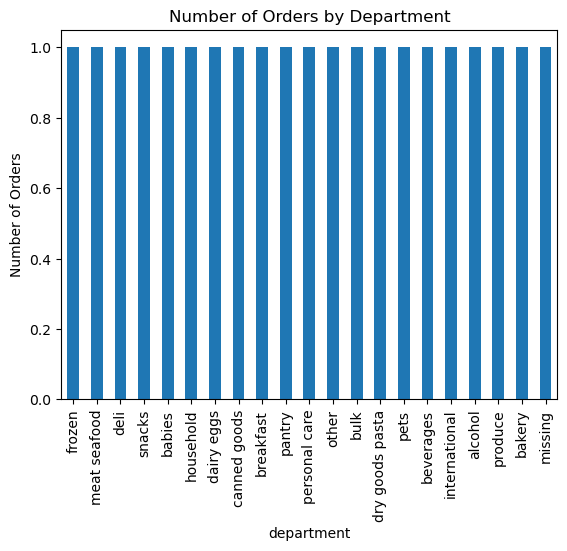

In [45]:
bar_dep= df_dep_t_new['department'].value_counts().plot.bar()
bar_dep.set( ylabel= 'Number of Orders', title='Number of Orders by Department')